Load Performance Results 

In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, classification_report
import joblib
import shap

# Load results
with open("../results/model_performance.json", "r") as f:
    results = json.load(f)

# Load model
model_data = joblib.load("../models/best_xgboost_model.pkl")
best_model = model_data["model"]
best_threshold = model_data["best_threshold"]

print(f"Loaded Model - AUC: {results['roc_auc']:.4f}, PR-AUC: {results['pr_auc']:.4f}, Threshold: {best_threshold:.4f}")

# Load test set
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

# Generate predictions
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= best_threshold).astype(int)


Loaded Model - AUC: 0.9606, PR-AUC: 0.5593, Threshold: 0.3166


Plot PR Curve 

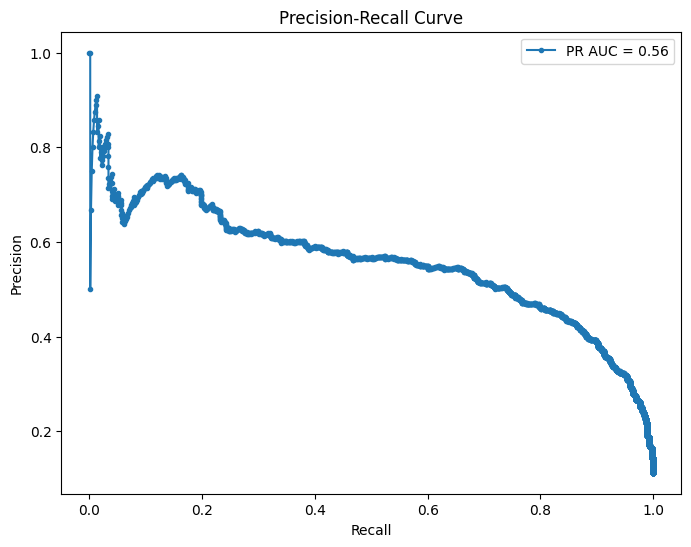

In [3]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label=f'PR AUC = {results["pr_auc"]:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Plot ROC Curve 

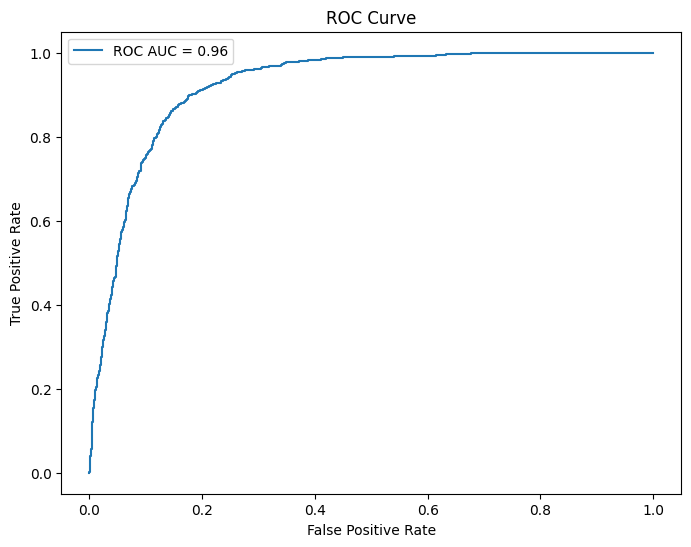

In [4]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC AUC = {results["roc_auc"]:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Feature Importance (SHAP)


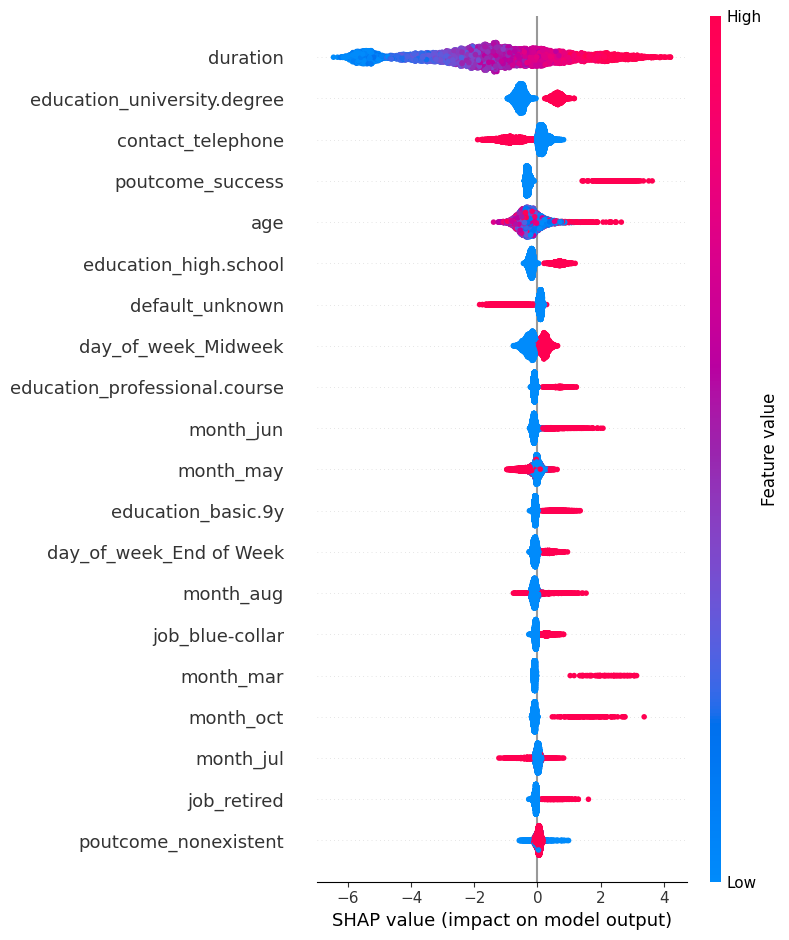

In [5]:
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


Plot Normalized Confusion Matrix


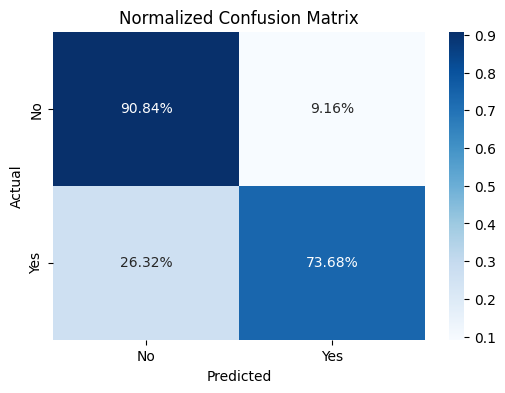

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')  # Use y_test
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt=".2%", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()